In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nb_df = pd.read_csv("data/42mer_k14/42mer_k14_nb_final_Tm.tsv", sep="\t")
probe_df = pd.read_csv("data/42mer_k14/42mer_k14_probe_final_Tm.tsv", sep="\t")
implied_df = pd.read_csv("data/42mer_k14/42mer_k14_implied_final_Tm.tsv", sep="\t")

In [3]:
barcode_type_ls = []
for i in range(len(nb_df)):
    barcode_type_ls.append("NANOBODY")
nb_df = nb_df.assign(BARCODE_TYPE=barcode_type_ls)

In [4]:
barcode_type_ls = []
for i in range(len(probe_df)):
    barcode_type_ls.append("ISH_PROBE")
probe_df = probe_df.assign(BARCODE_TYPE=barcode_type_ls)

In [5]:
barcode_type_ls = []
for i in range(len(implied_df)):
    barcode_type_ls.append("IMPLIED")
implied_df = implied_df.assign(BARCODE_TYPE=barcode_type_ls)

In [6]:
all_df = pd.concat([nb_df, probe_df, implied_df], ignore_index=True)

In [7]:
all_df

,BARCODE ID,BARCODE SEQ,TM_ROUND,TM,BARCODE_TYPE
0,nb-seq1869996,GCTCCGAGTACAATGCTCCGAGTAGTATGCTCCGAGTAGCAT,86.63,86.634214,NANOBODY
1,nb-seq1346423,TCTAGGACAATCGCTCTAGGAGTATCGCTCTAGGAGCATCGC,87.13,87.129289,NANOBODY
2,nb-seq519434,TACGGCACCGATTGTACGGCACCAATTGTACGGCACGTATTG,85.64,85.637659,NANOBODY
3,nb-seq5523087,ACCAACAGGTTTGCACGTACAGGTTTGCACGCACAGGTTTGC,85.79,85.786318,NANOBODY
4,nb-seq657033,GCGATTGACGCCTAGCAATTGACGCCTAGGTATTGACGCCTA,87.04,87.036328,NANOBODY
...,...,...,...,...,...
1577515,nb-seq1206525_probe-seq3842819,CCTGAGTCGGACTACCTGAGTGCTACGGATGCCATGCTACGG,87.93,87.926099,IMPLIED
1577516,nb-seq1206525_probe-seq2453994,ATATTAGCGCGTCAATATCAGGCTACGGATGCCATGCTACGG,86.54,86.535595,IMPLIED
1577517,nb-seq1206525_probe-seq1726065,CTCTGAGGACATTGCTCTGAGGCTACGGATGCCATGCTACGG,88.21,88.210071,IMPLIED
1577518,nb-seq1206525_probe-seq569455,TCGCAATCGGTAGCTCGCAATGCTACGGATGCCATGCTACGG,89.68,89.679329,IMPLIED


Text(0, 0.5, 'melting temperature (Tm)')

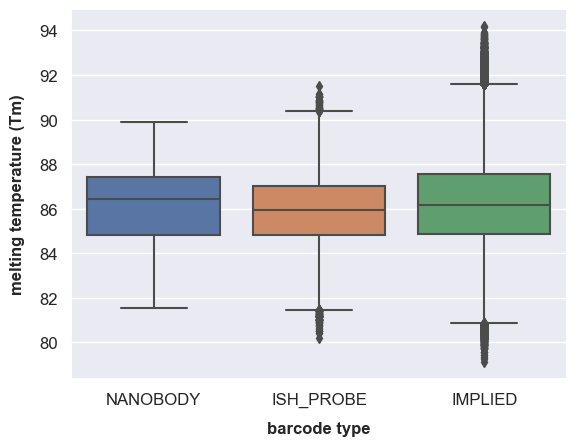

In [16]:
sns.set()
sns.set(font_scale = 1.1)
def label_medians(dataframe, boxplot, x, y):
    medians = round(dataframe.groupby([x])[y].median(), 2)
    vertical_offset = dataframe[y].median() * 0.001
    for xtick in boxplot.get_xticks():
        boxplot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], horizontalalignment='center',size='x-small',color='w',weight='semibold')
        
# print("\n")
bc_boxplot = sns.boxplot(data=all_df, x="BARCODE_TYPE", y="TM", whis=1.5)
bc_boxplot.set_xlabel('barcode type', fontdict={'size': 12, "weight": "bold"}, labelpad=10)
bc_boxplot.set_ylabel('melting temperature (Tm)', fontdict={'size': 12, "weight": "bold"}, labelpad=10)
# label_medians(all_df, bc_boxplot, "BARCODE_TYPE", "TM")